# Processing surfaces and points in napari - from python
[napari-process-points-and-surfaces]() (nppas) allows post-processing of surface and point cloud data. The available functionality uses [open3d](http://www.open3d.org/) in the background.
For detailed explanation of the underlying algorithms, please refer to the [open3d documentation](http://www.open3d.org/docs/release/).

In [2]:
import napari
from napari.utils import nbscreenshot
import numpy as np

from napari_process_points_and_surfaces import (example_data_vedo_ellipsoid,
                                                vedo_smooth_mesh,
                                                vedo_subdivide_loop,
                                                vedo_subdivide_linear,
                                                vedo_subdivide_adaptive,
                                                vedo_subdivide_butterfly,
                                                vedo_sample_points_from_surface,
                                                vedo_subsample_points,
                                                vedo_points_to_convex_hull_surface,
                                                largest_label_to_surface,
                                                labels_to_centroids,
                                                points_to_labels,
                                                vedo_fill_holes)

In [3]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

napari.manifest -> 'napari' could not be imported: Could not find file 'builtins.yaml' in module 'napari'


In [4]:
from skimage.data import cells3d
nuclei = cells3d()[:,1,60:120,30:80]
nuclei.shape

(60, 60, 50)

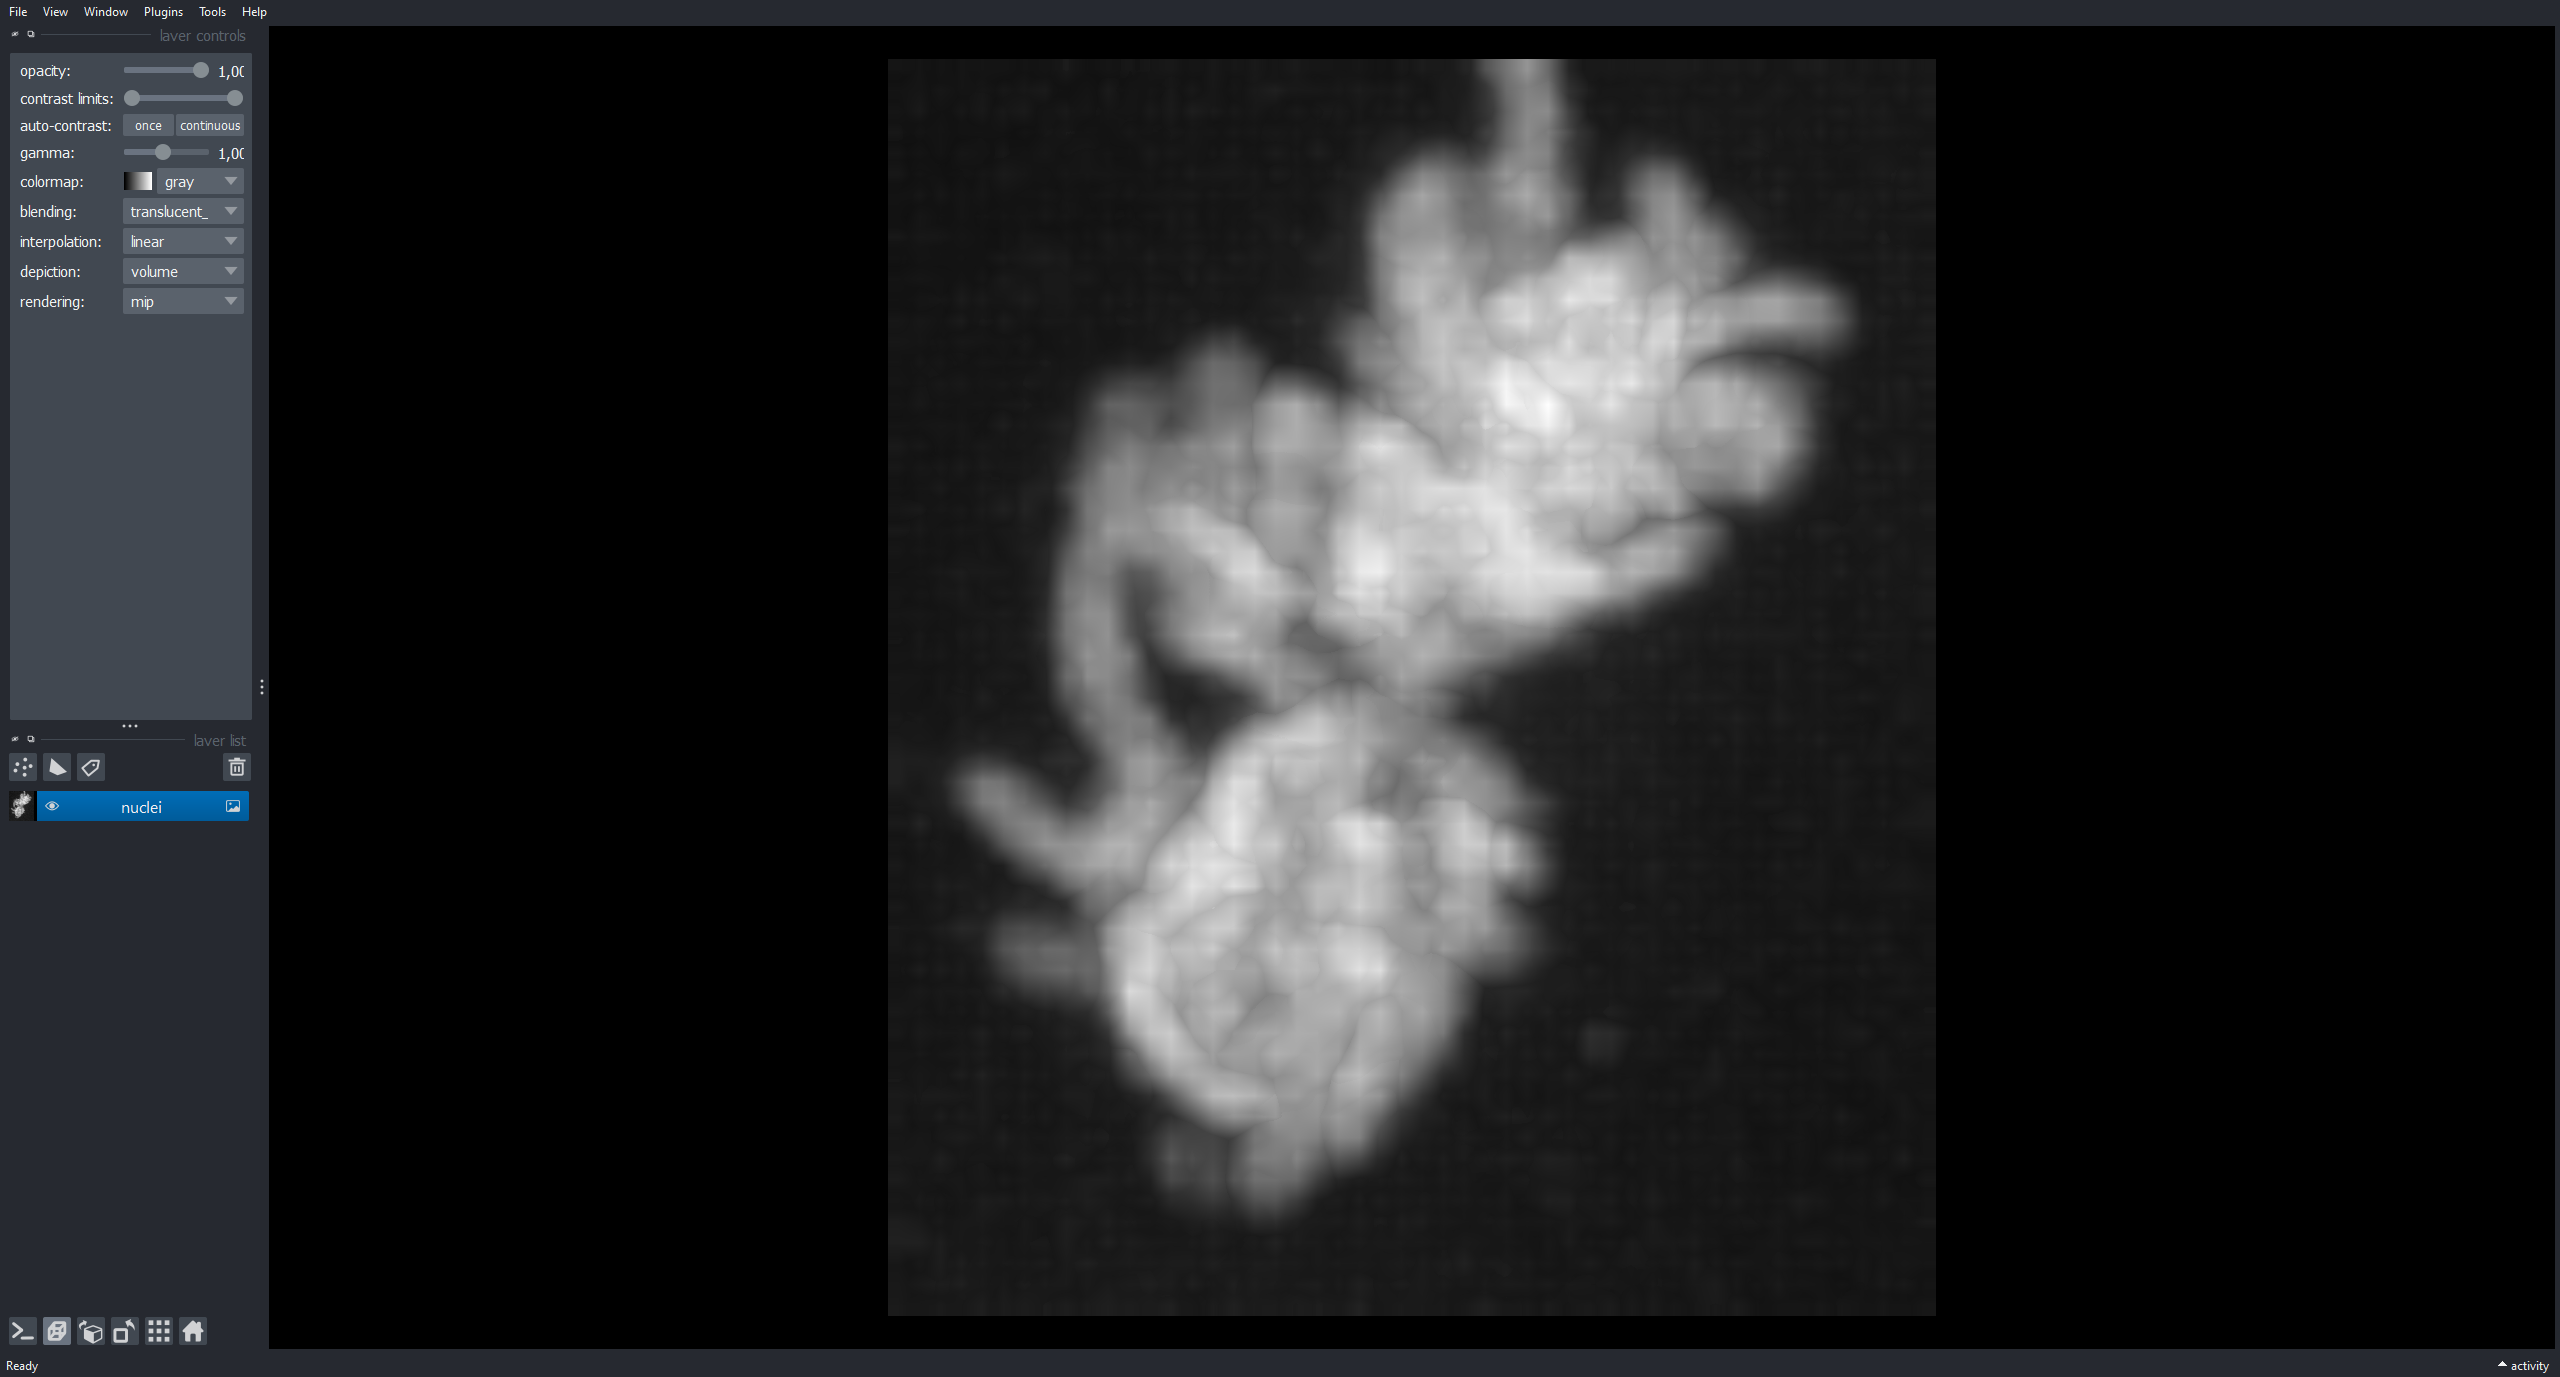

In [5]:
viewer.add_image(nuclei)

nbscreenshot(viewer)

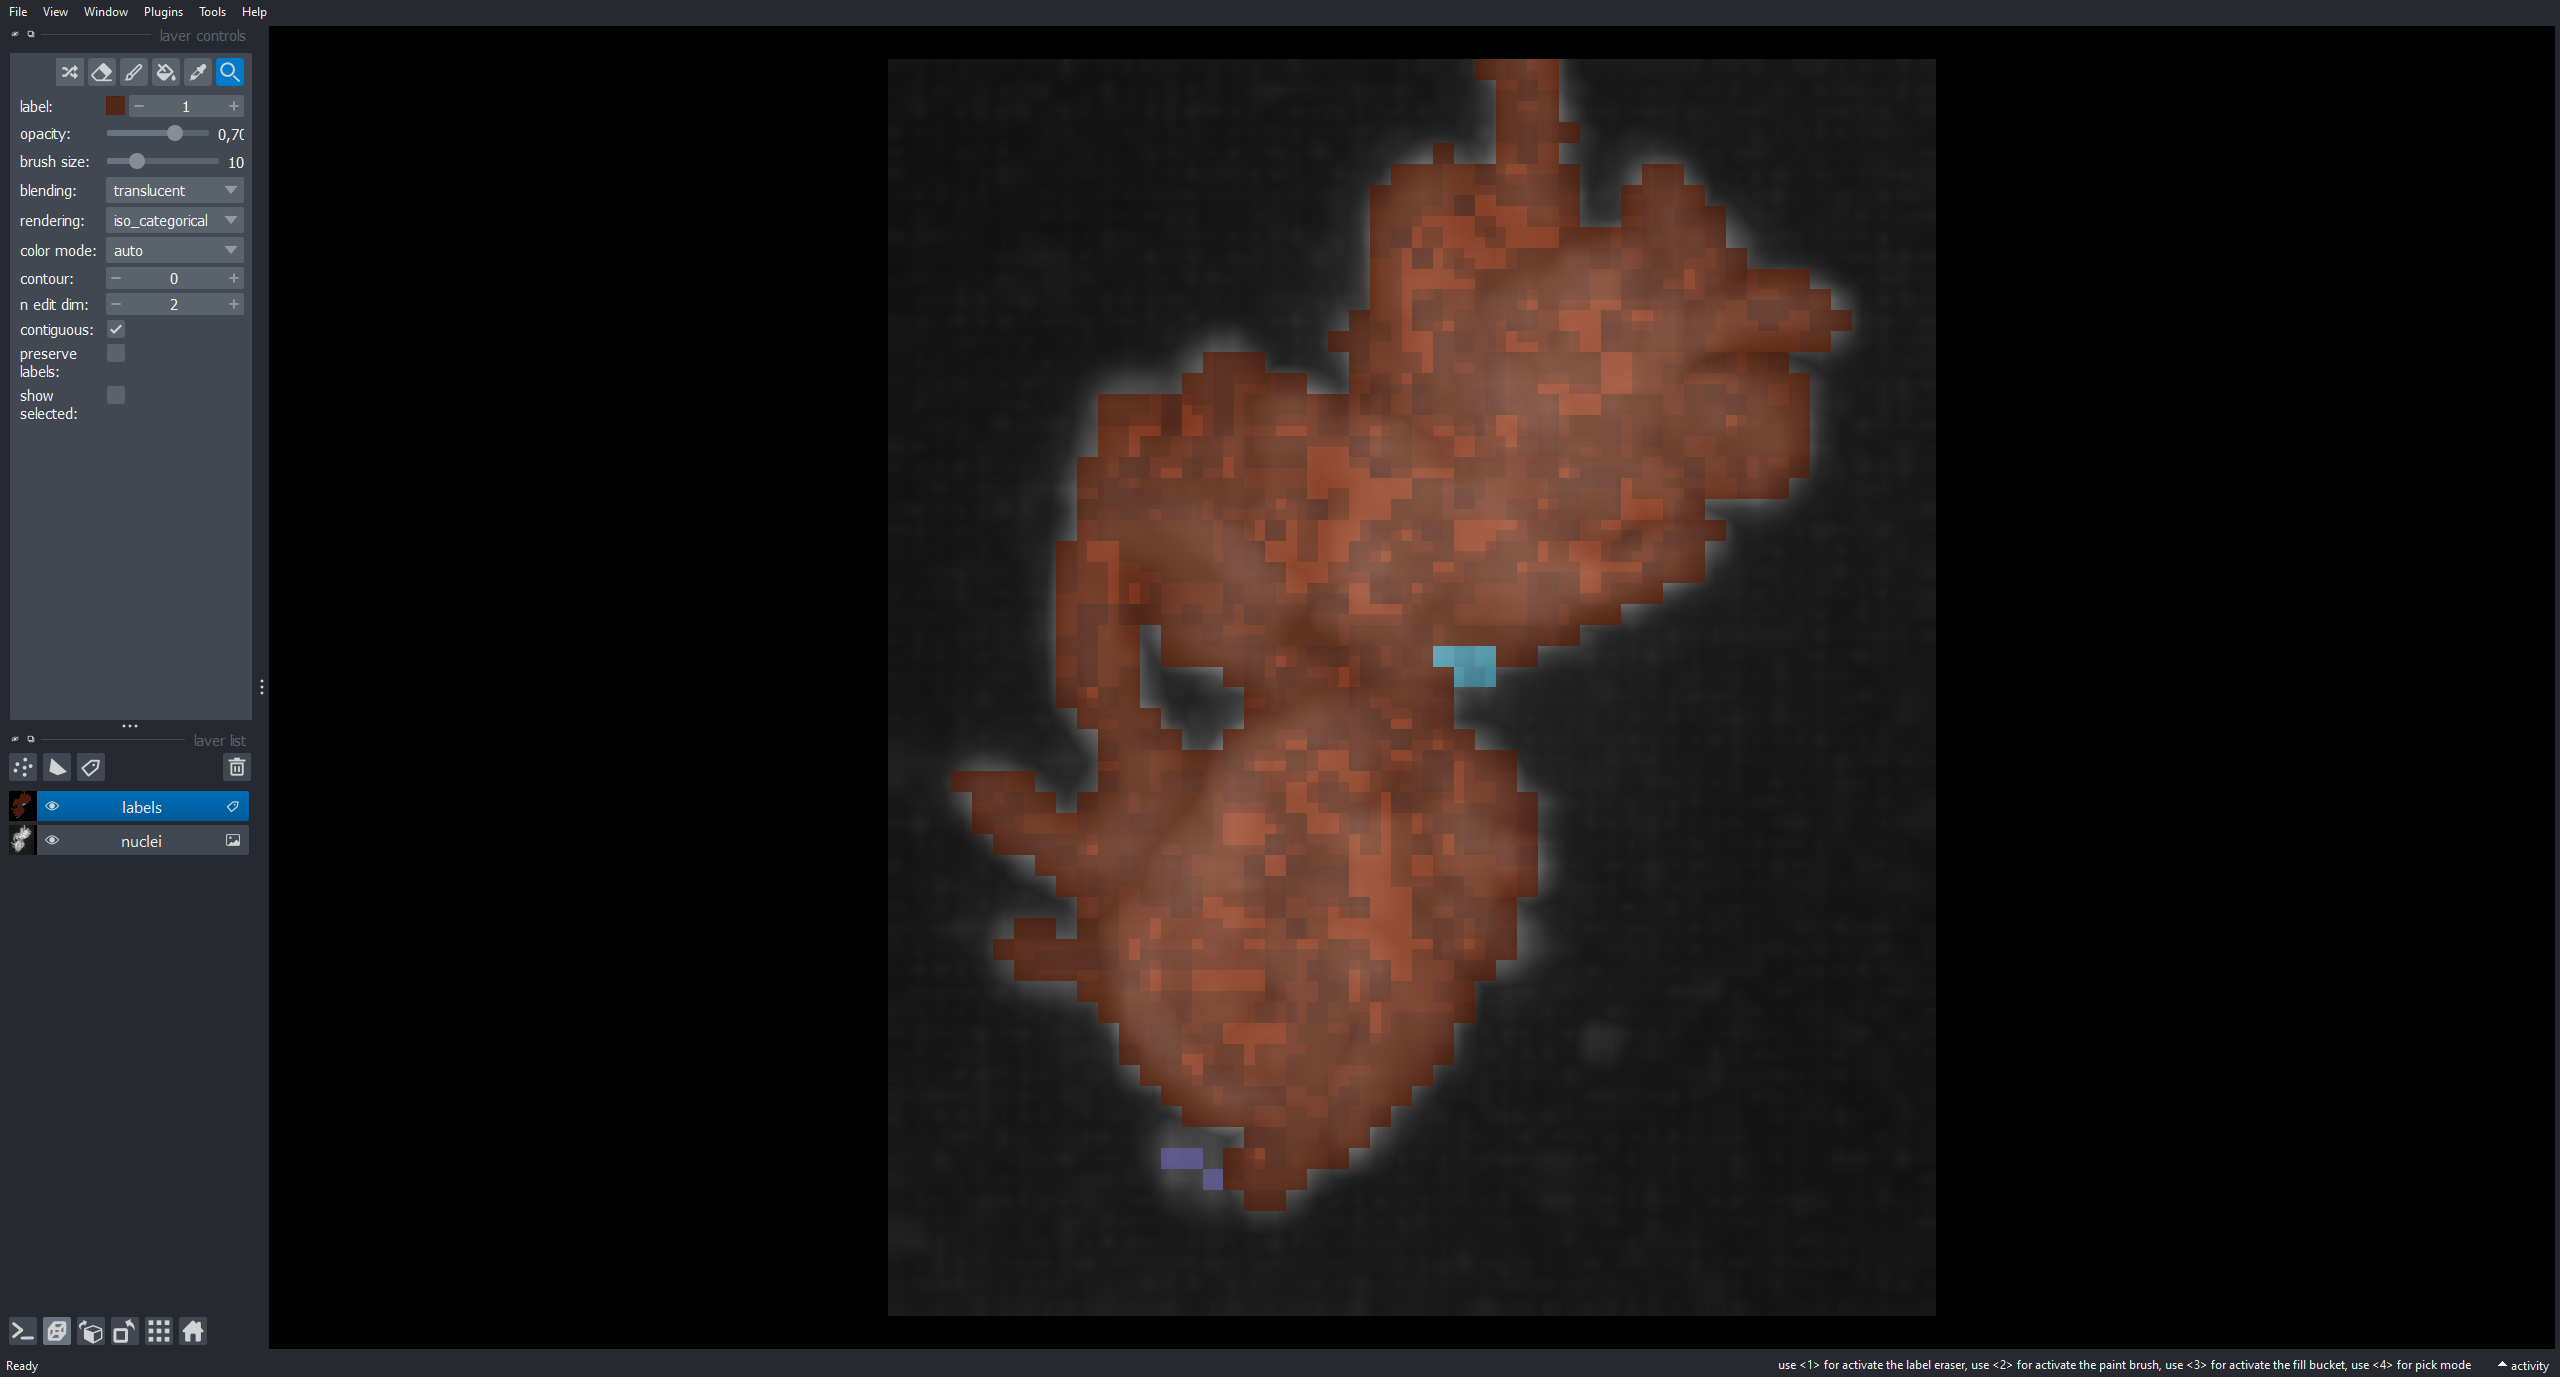

In [6]:
from skimage.measure import label
labels = label(nuclei>20000)

viewer.add_labels(labels)

nbscreenshot(viewer)

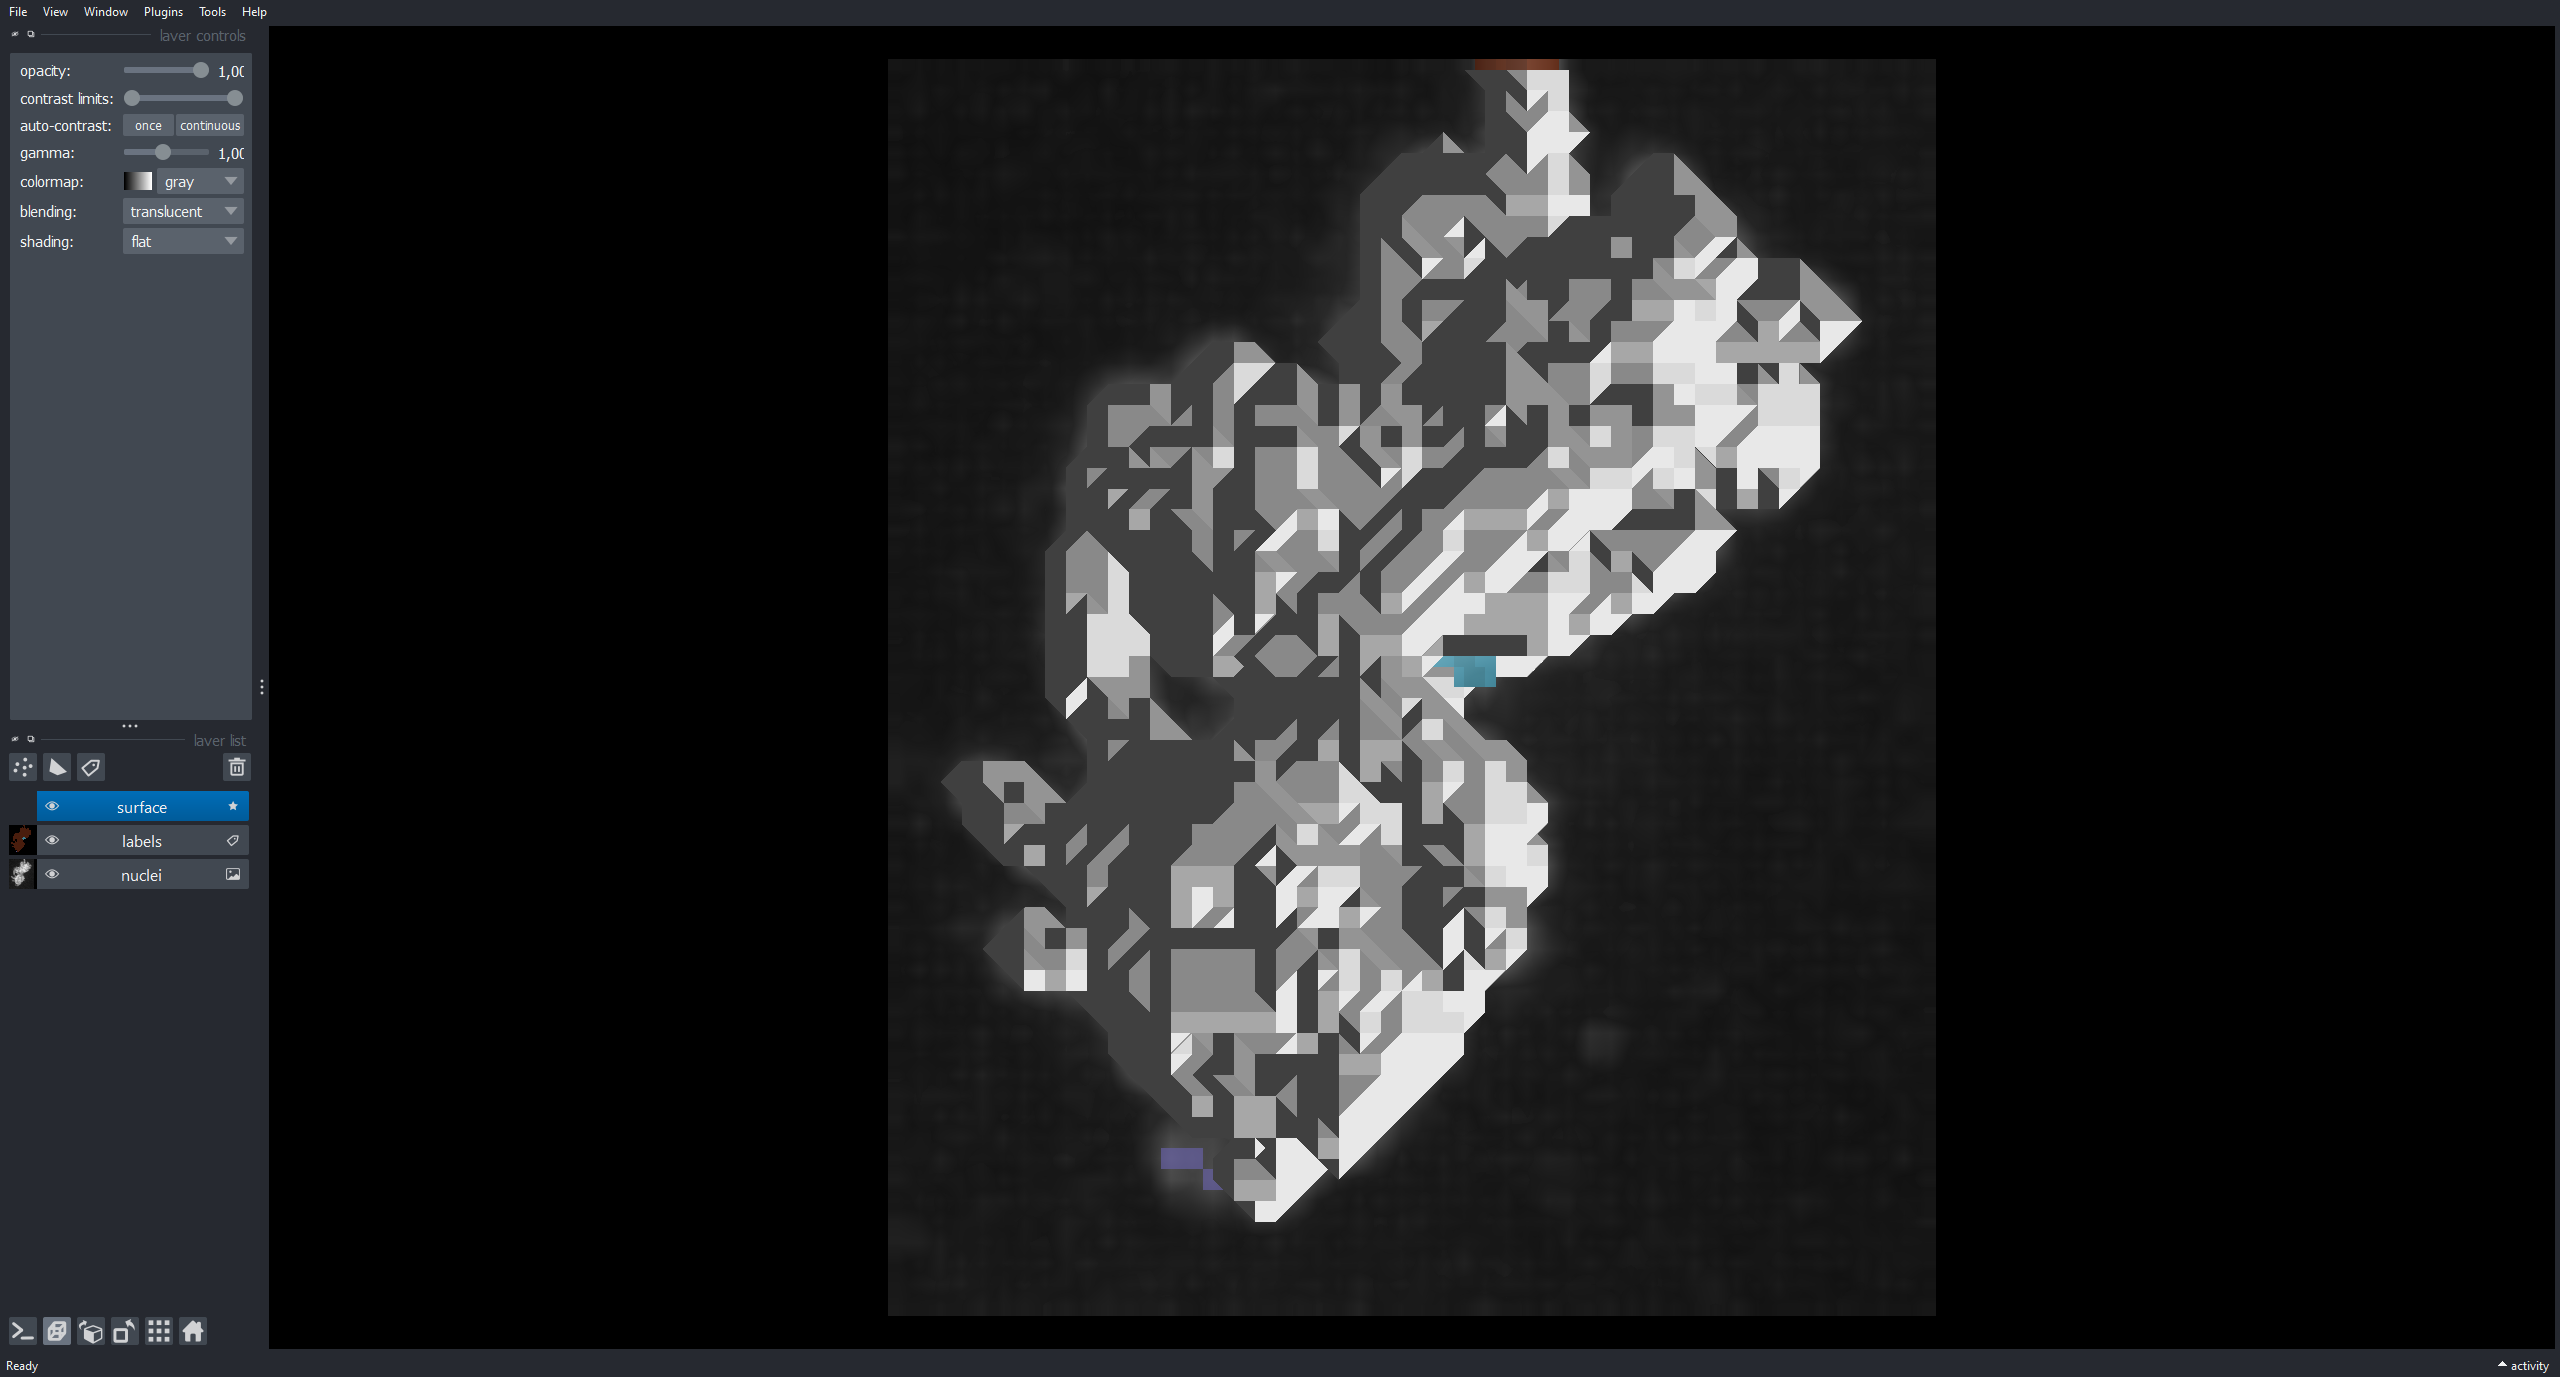

In [7]:
surface = largest_label_to_surface(labels)

surface_layer = viewer.add_surface(surface, blending='translucent', shading='flat')
surface = surface_layer.data

nbscreenshot(viewer)

## Surface filtering

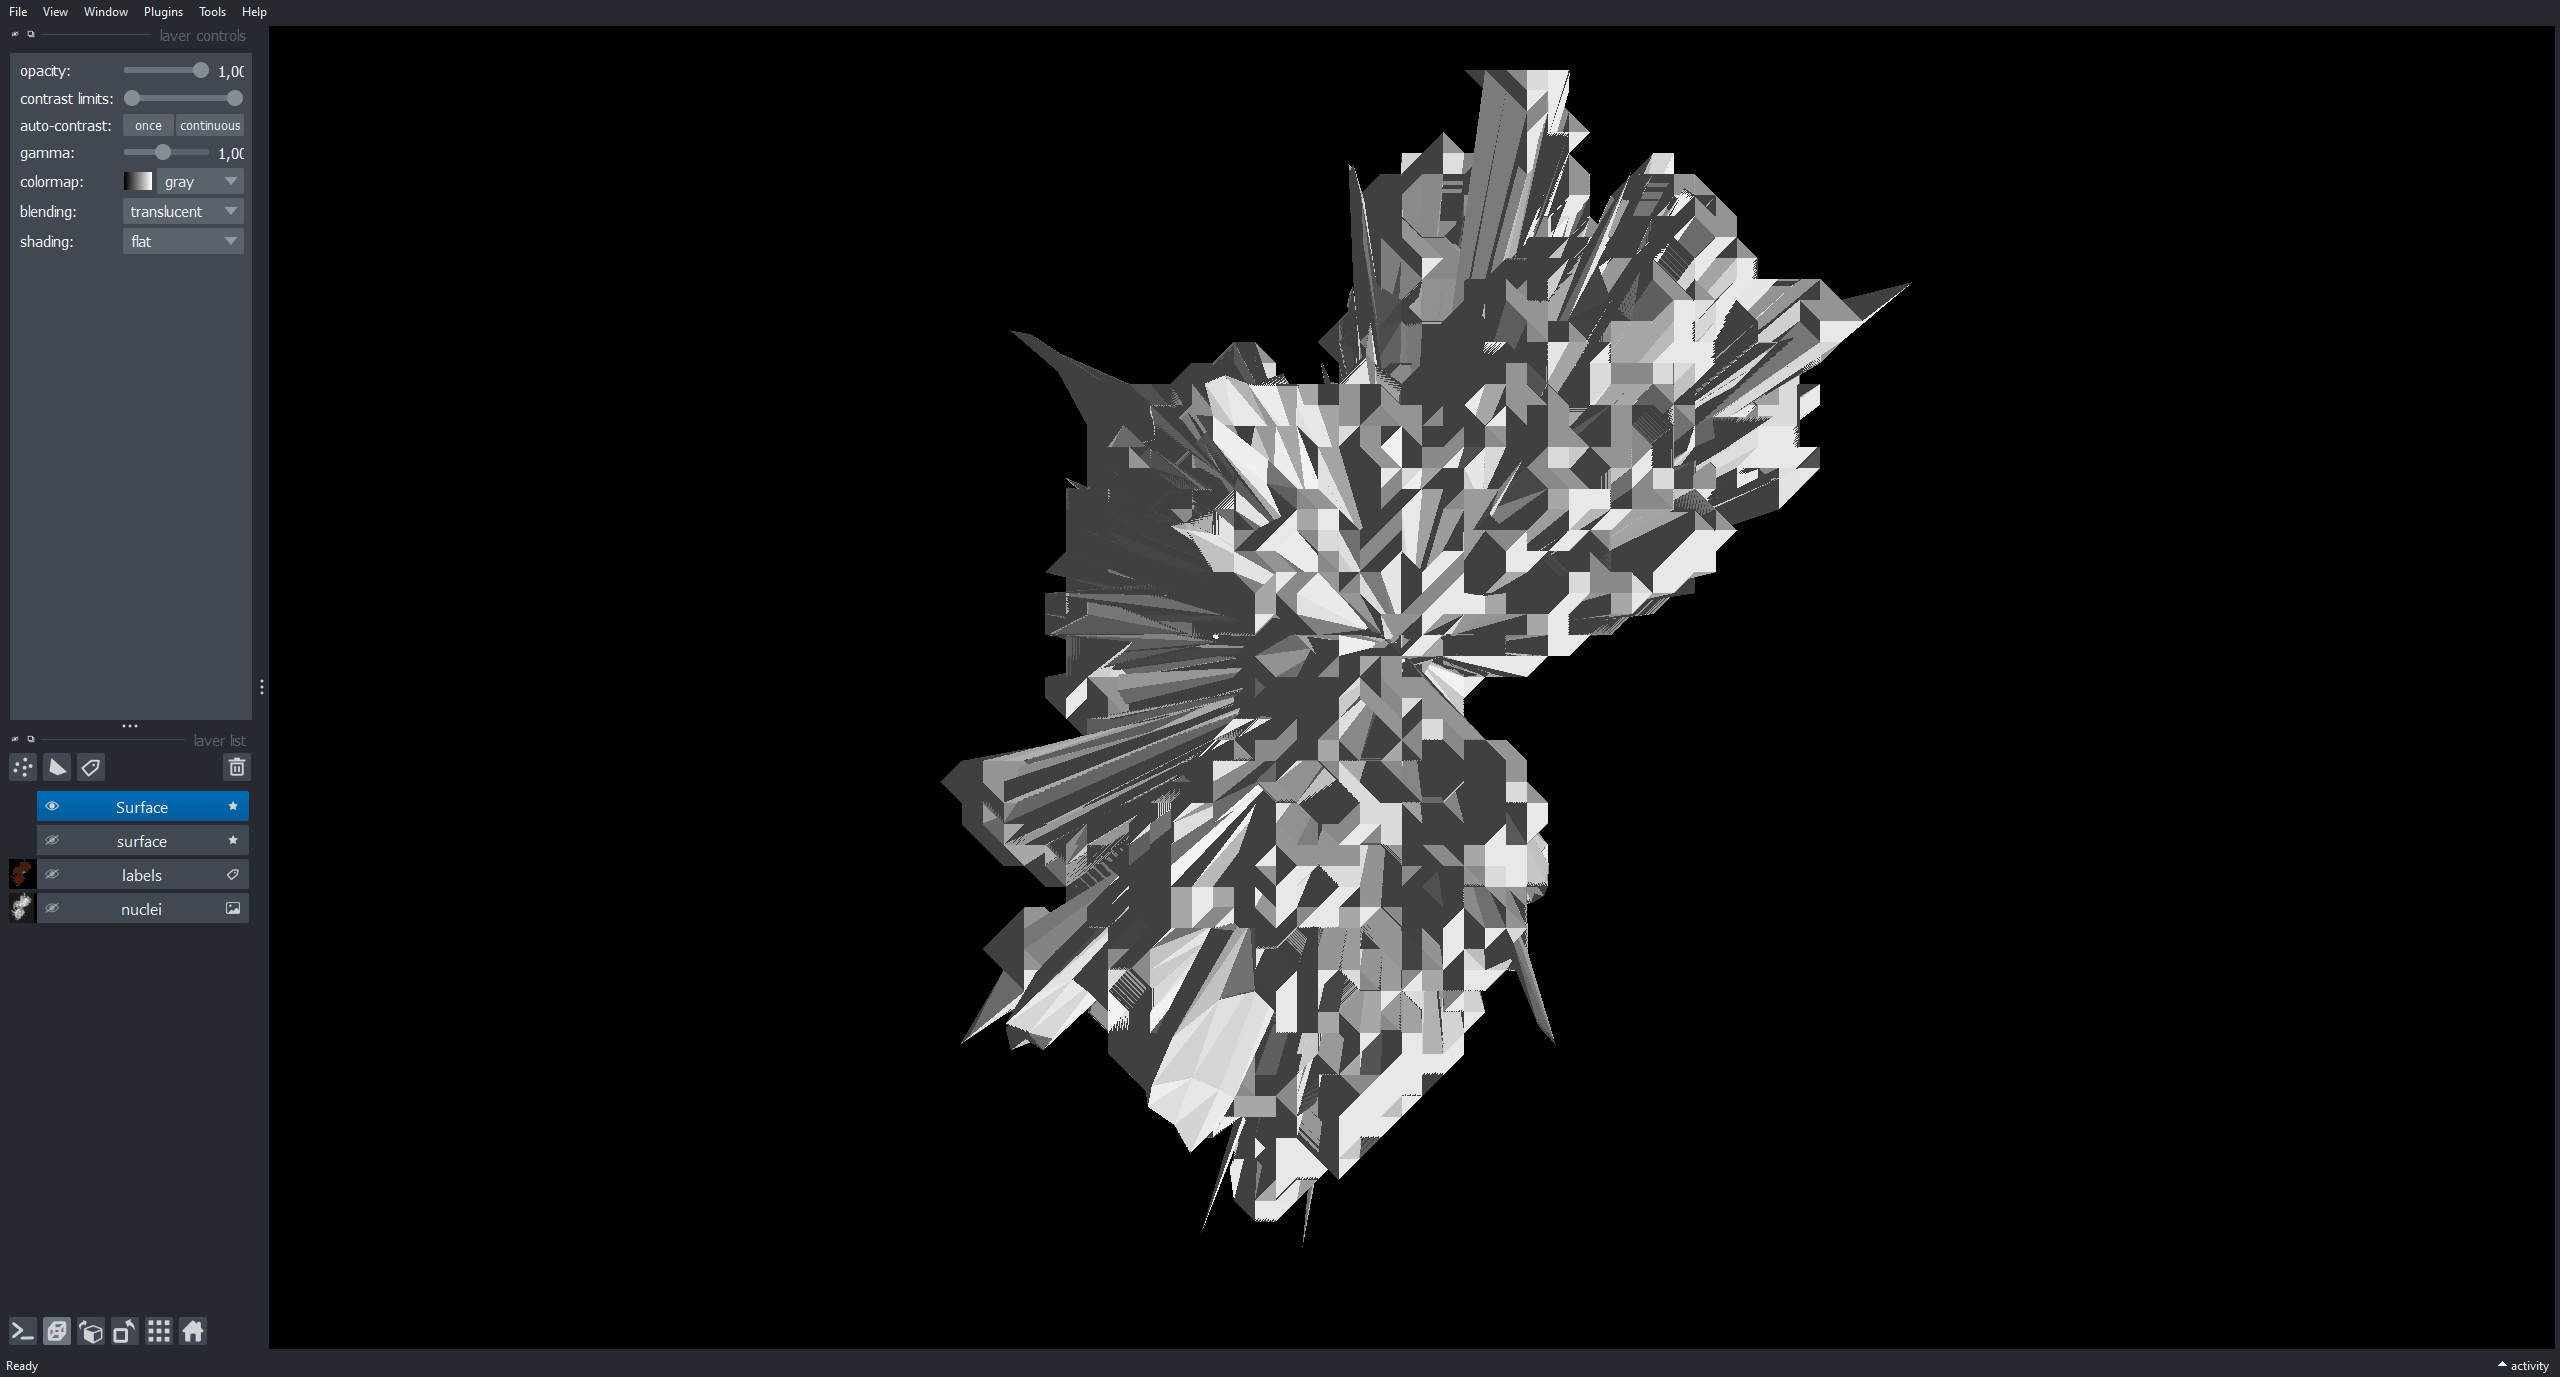

In [8]:
hide_all(viewer)

viewer.add_surface(vedo_smooth_mesh(surface))

nbscreenshot(viewer)

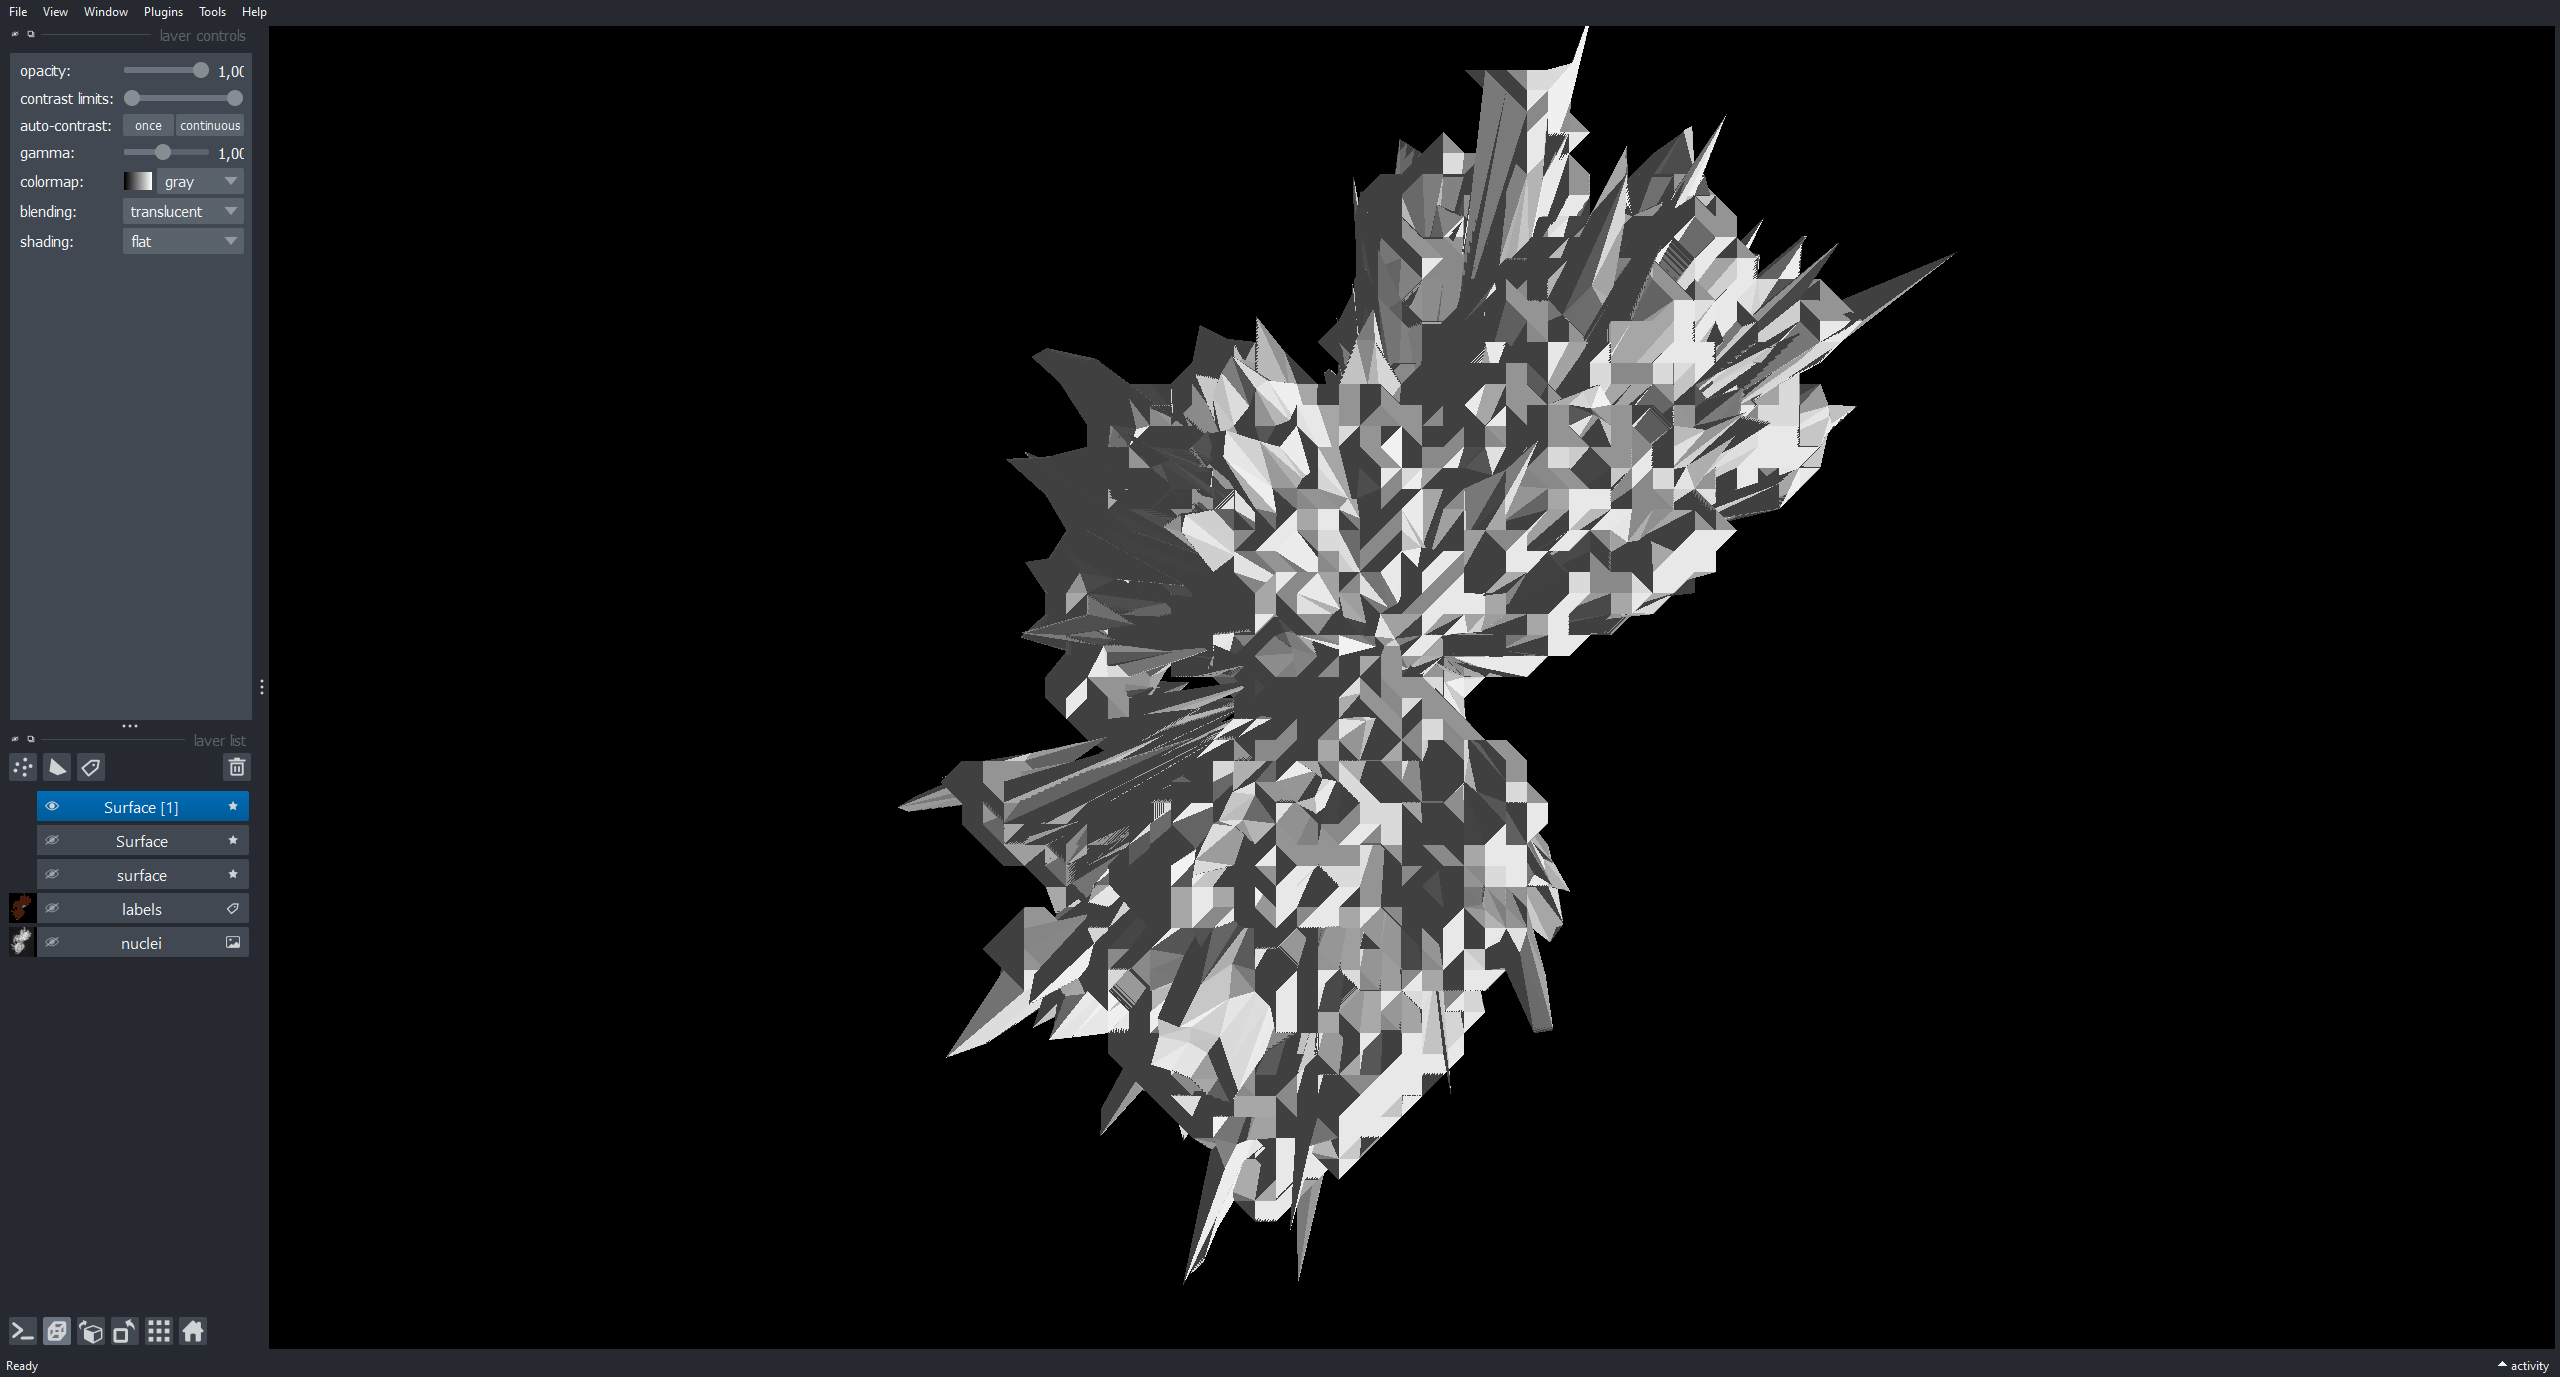

In [9]:
hide_all(viewer)

viewer.add_surface(vedo_smooth_mesh(surface, 10))

nbscreenshot(viewer)

## Surface subdivision

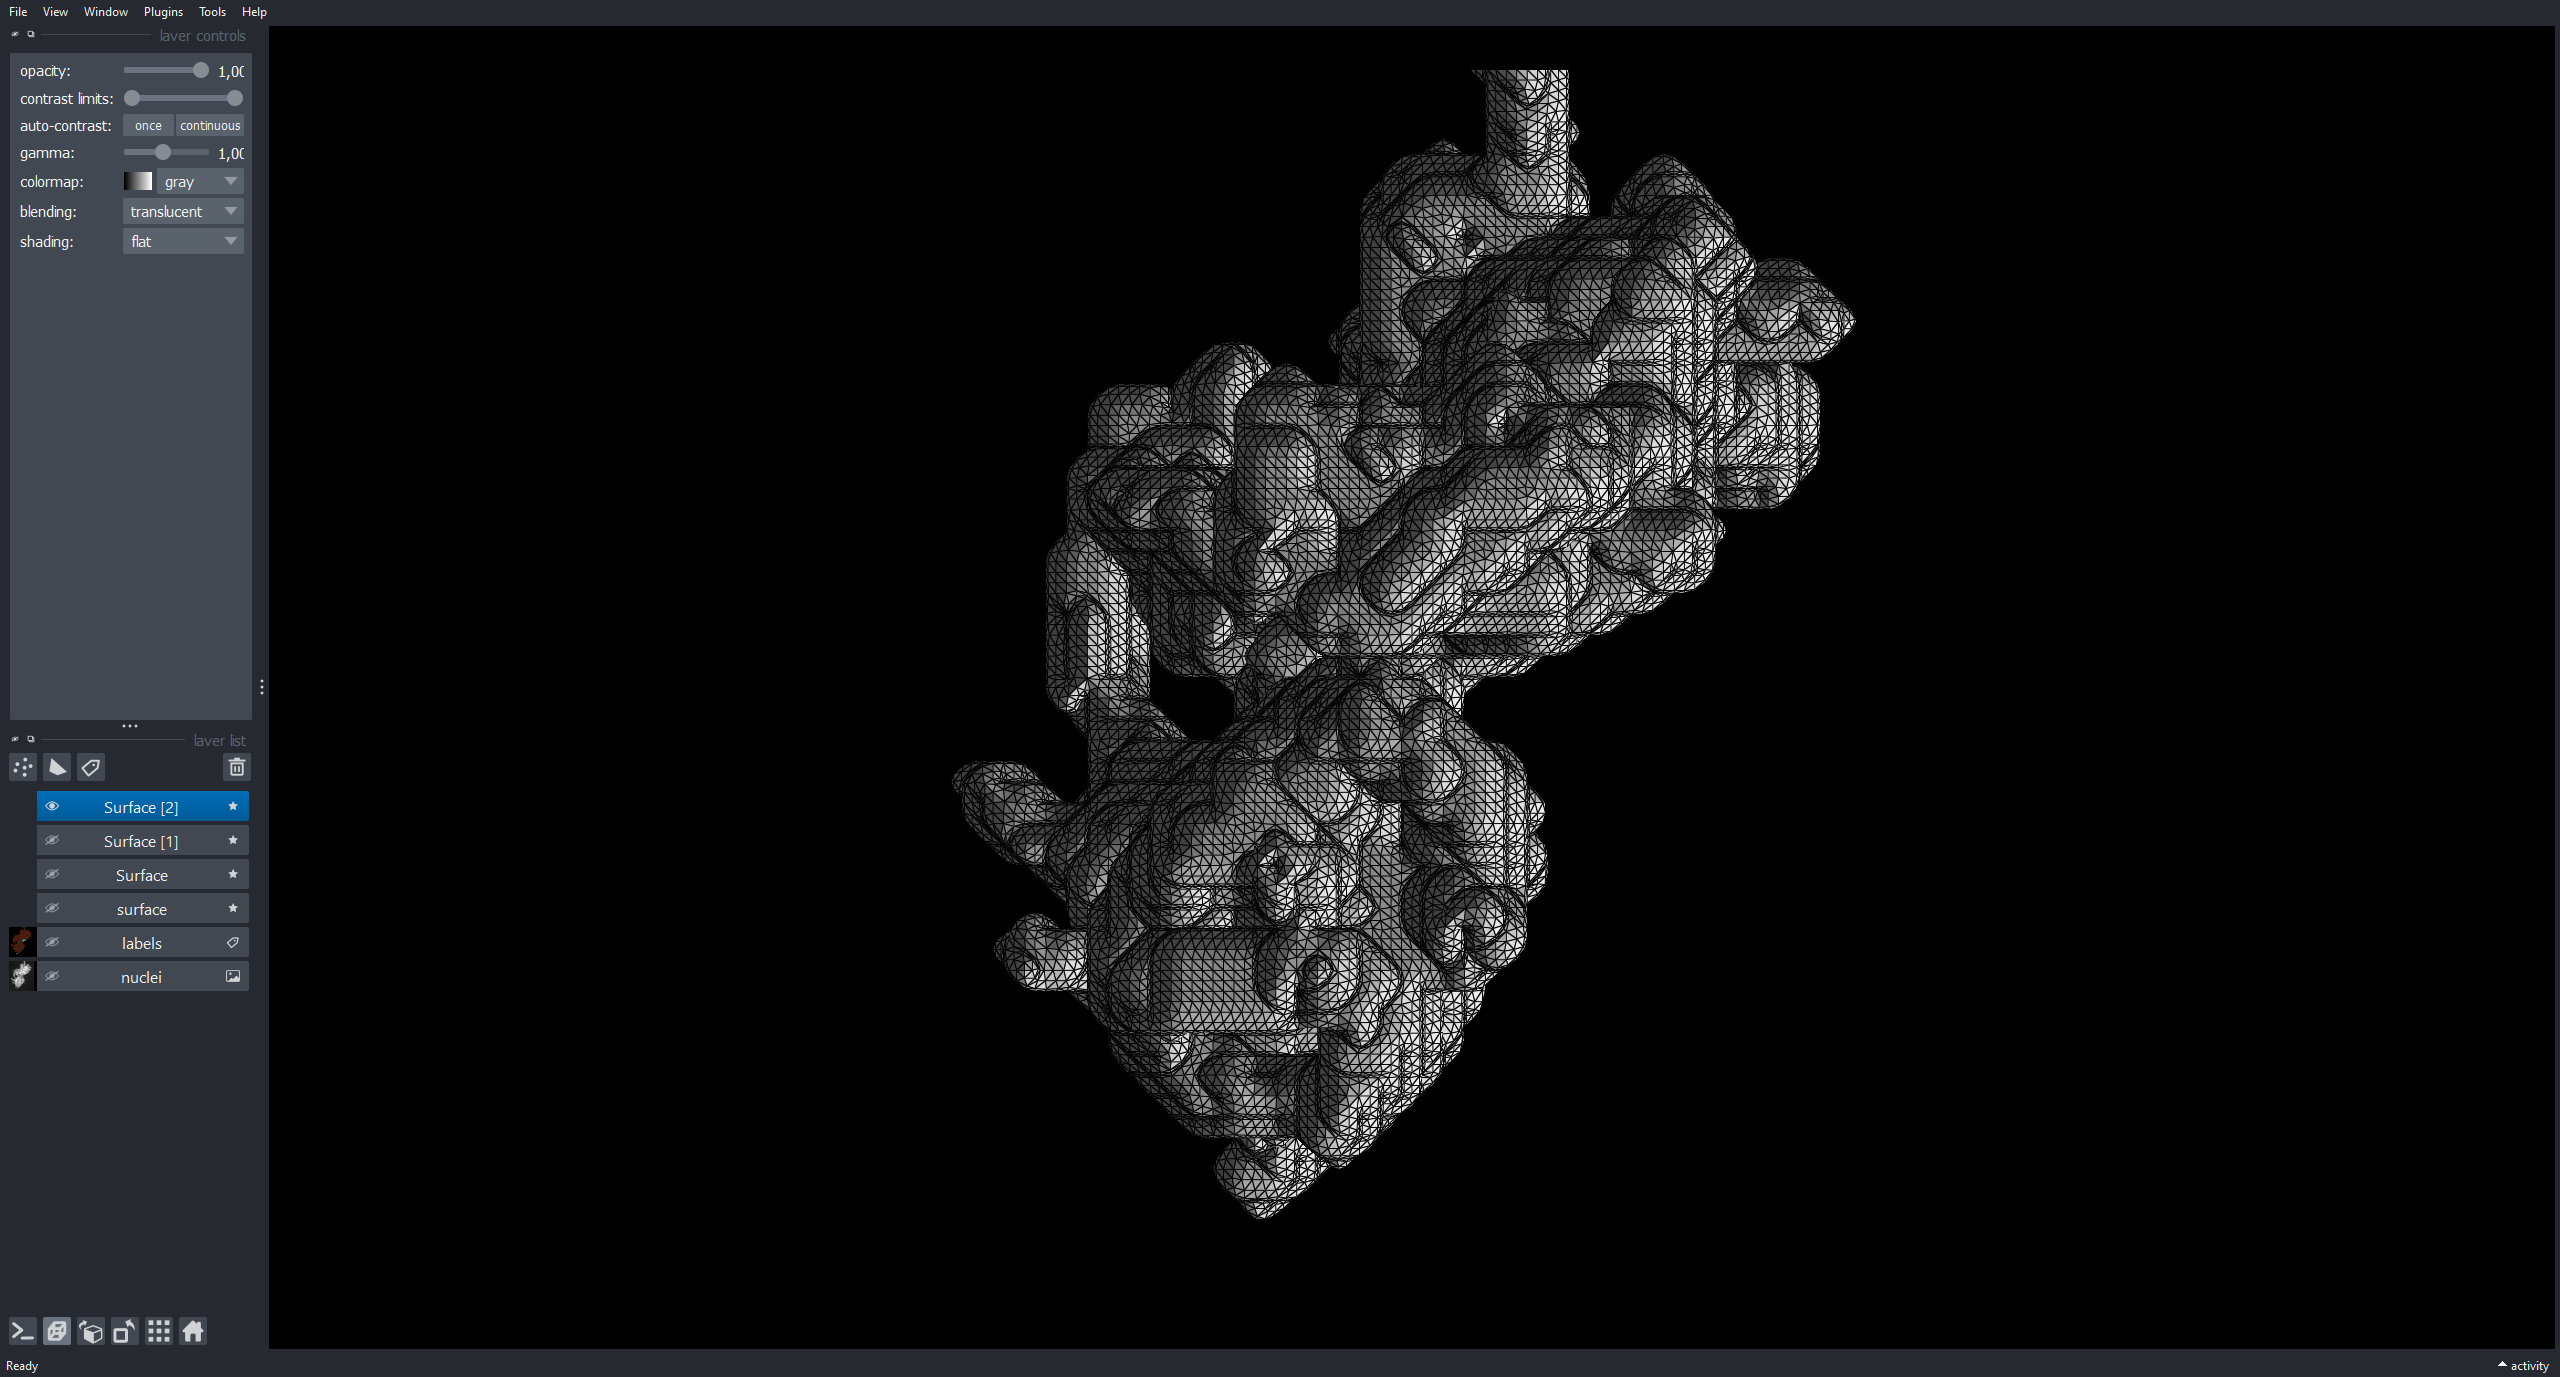

In [11]:
hide_all(viewer)

viewer.add_surface(vedo_subdivide_loop(surface))
viewer.layers[-1].wireframe.visible = True

nbscreenshot(viewer)

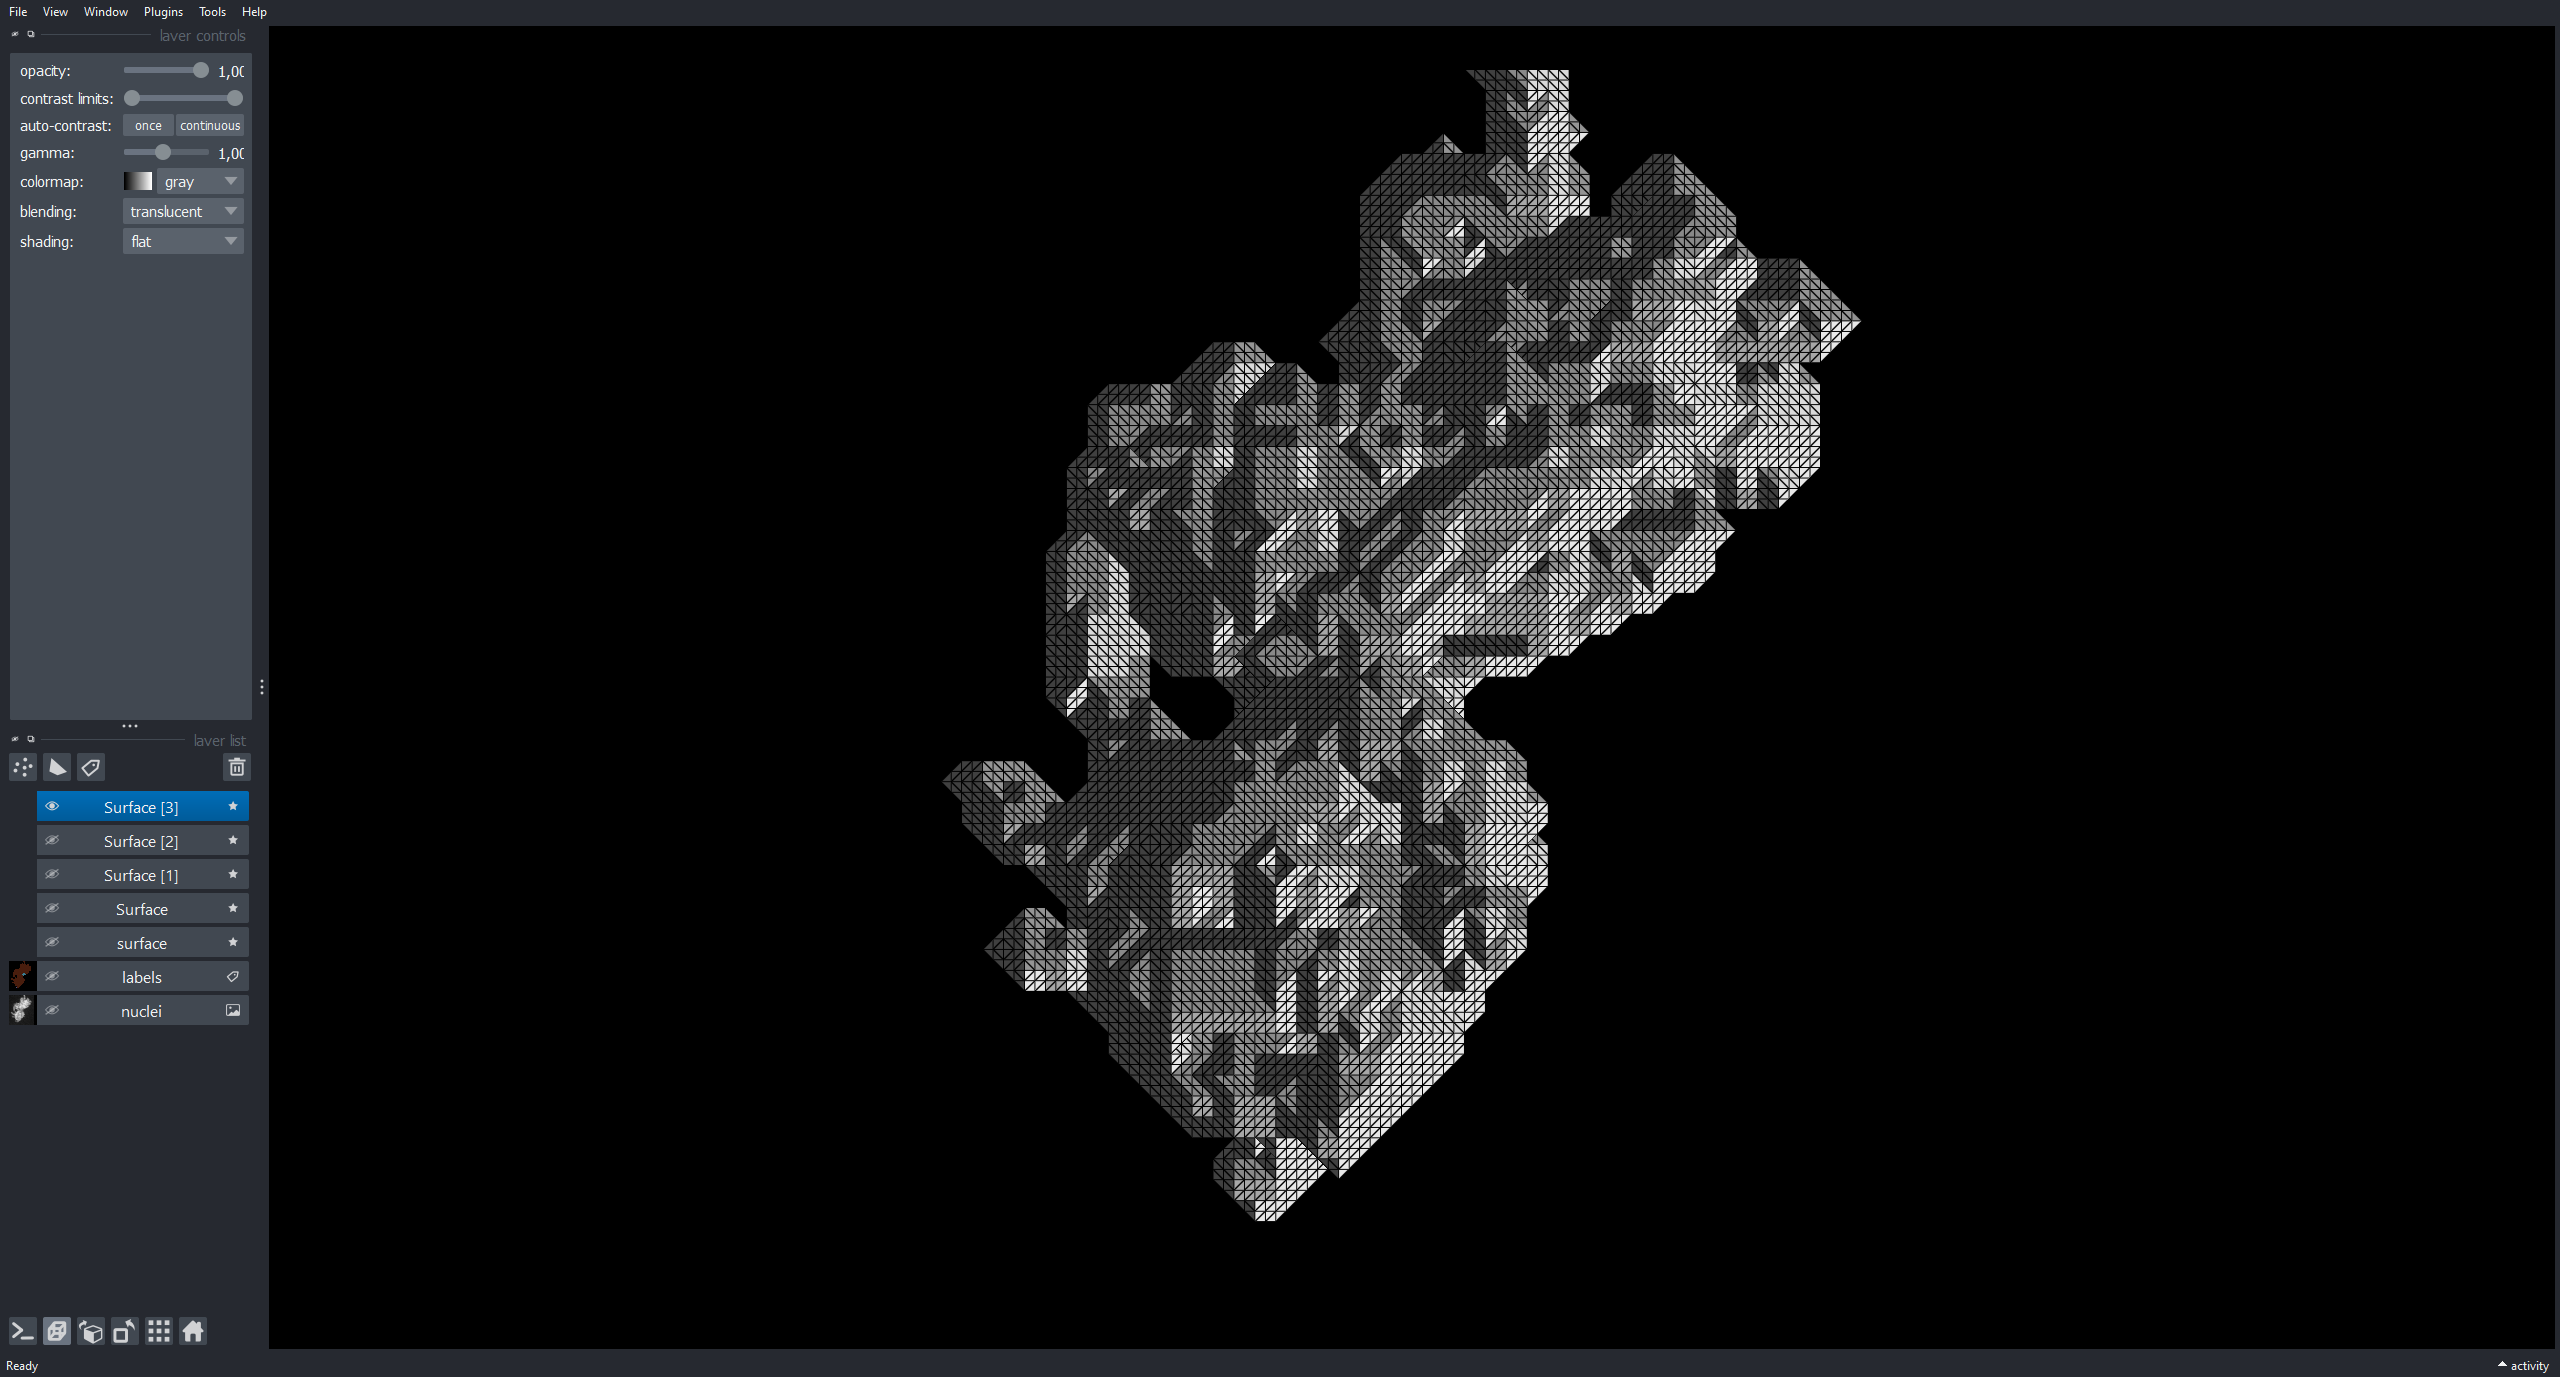

In [12]:
hide_all(viewer)

viewer.add_surface(vedo_subdivide_linear(surface))
viewer.layers[-1].wireframe.visible = True

nbscreenshot(viewer)

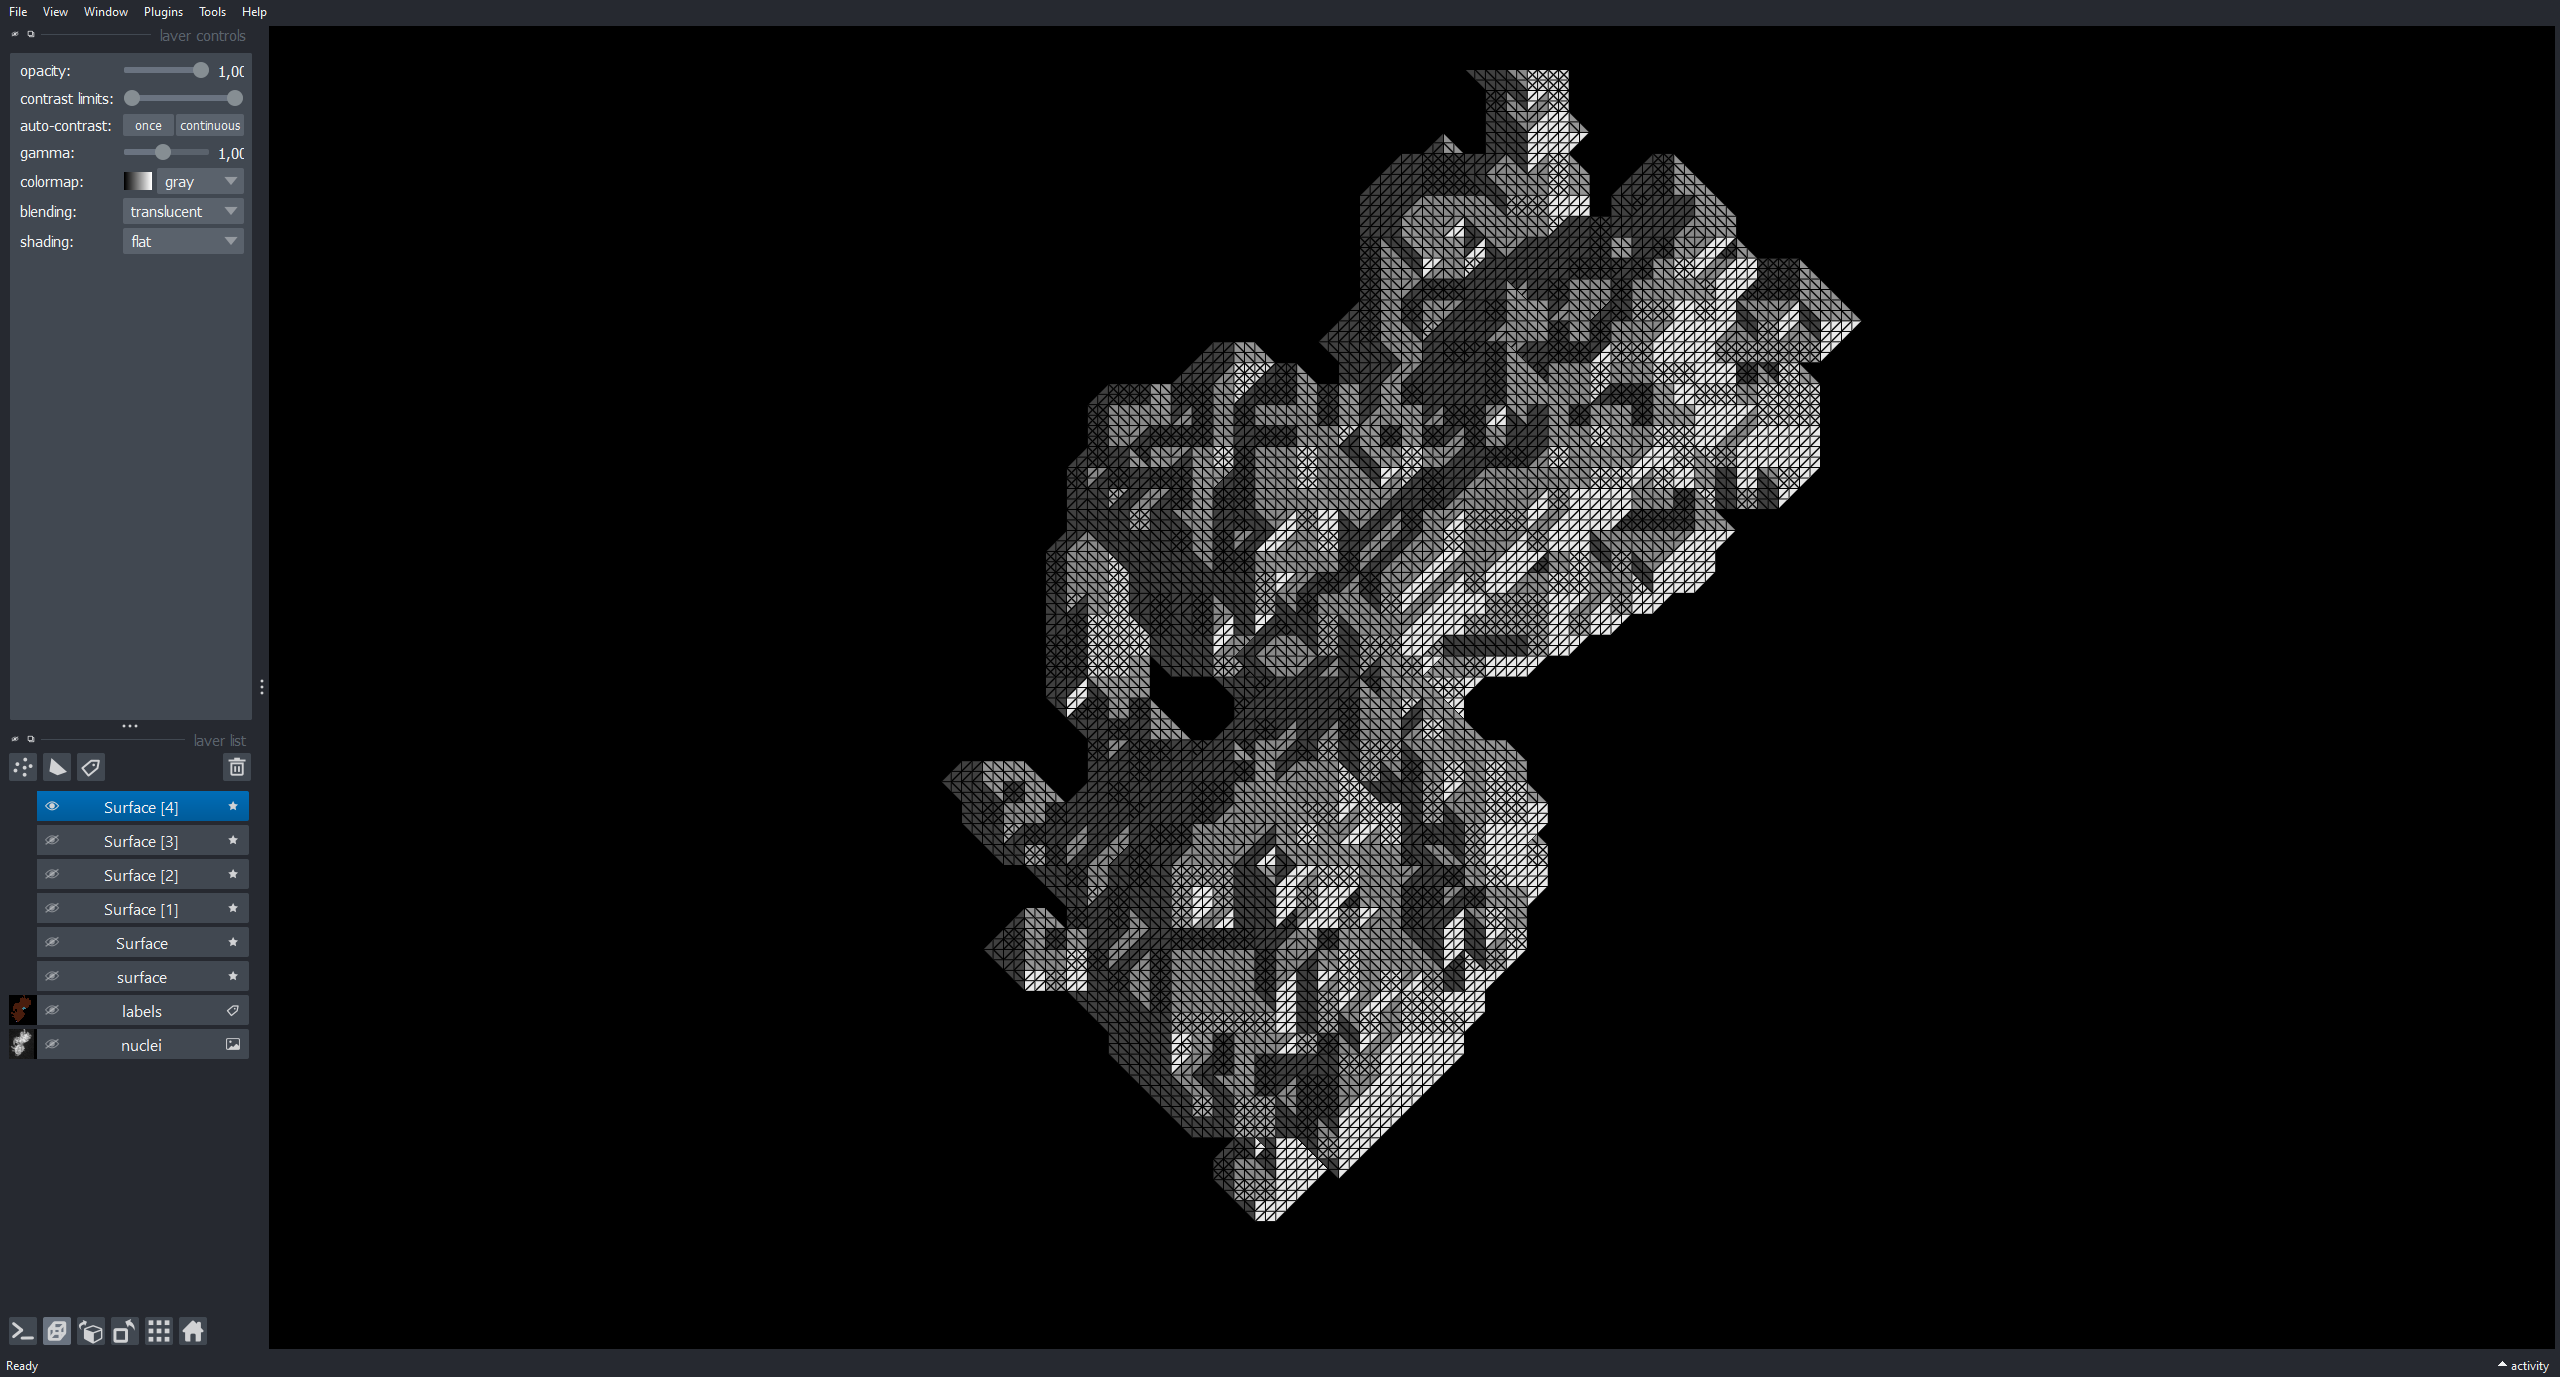

In [13]:
hide_all(viewer)

viewer.add_surface(vedo_subdivide_adaptive(surface))
viewer.layers[-1].wireframe.visible = True

nbscreenshot(viewer)

In [ ]:
hide_all(viewer)

viewer.add_surface(vedo_subdivide_butterfly(surface))
viewer.layers[-1].wireframe.visible = True

nbscreenshot(viewer)

## Point clouds

In [ ]:
hide_all(viewer)

labels_to_centroids(labels, viewer=viewer)
centroids = viewer.layers[-1].data

nbscreenshot(viewer)

In [ ]:
hide_all(viewer)
    
point_cloud = vedo_sample_points_from_surface(surface, distance_fraction=0.01)

points_layer = viewer.add_points(point_cloud, size=1)

nbscreenshot(viewer)

In [ ]:
hide_all(viewer)
    
points2 = vedo_subsample_points(points_layer.data, distance_fraction=0.1)

viewer.add_points(points2, size=1)

nbscreenshot(viewer)

## From points to labels

In [ ]:
hide_all(viewer)

viewer.add_labels(points_to_labels(points_layer.data, labels))

nbscreenshot(viewer)

## From points to surfaces

In [ ]:
hide_all(viewer)

viewer.add_surface(vedo_points_to_convex_hull_surface(points_layer.data))

nbscreenshot(viewer)

In [ ]:
hide_all(viewer)

surface = vedo_points_to_convex_hull_surface(points_layer.data)
faces_del = np.delete(surface[1], np.random.randint(0, surface[1].shape[0], 10), axis=0)
viewer.add_surface((surface[0], faces_del), name='Surface with hole')
nbscreenshot(viewer)

In [ ]:
hide_all(viewer)
viewer.add_surface(vedo_fill_holes((surface[0], faces_del), size_limit=1000), name='Filled hole')
nbscreenshot(viewer)

In [ ]:
show_all(viewer)

viewer.grid.enabled = True
viewer.grid.stride = -1

nbscreenshot(viewer)